<a href="https://colab.research.google.com/github/EkaterinaSheina/price_prediction/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 47.2 MB/s eta 0:00:00


<ipython-input-2-4c15b7e75fe5>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


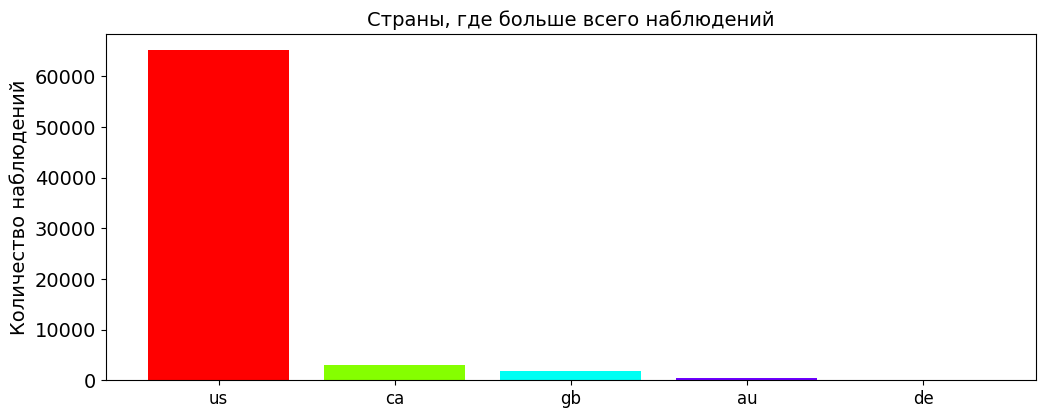

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pycountry
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

PLOT_LABEL_FONT_SIZE = 14

# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

# Установка размера 2D графика
def set_plot_size(w,h,figure=plt):
    fig_size = plt.rcParams['figure.figsize']
    fig_size[0] = 12
    fig_size[1] = 4.5
    figure.rcParams['figure.figsize'] = fig_size

set_plot_size(12, 4.5)

def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)

df = pd.read_csv('/content/scrubbed (1).csv', escapechar='`', low_memory=False)
df.fillna(value='unknown')
shapes_label_count = pd.value_counts(df['shape'].values, sort=True)

country_count = pd.value_counts(df['country'].values, sort=True)
country_count_keys, country_count_values = dict_sort(dict(country_count))
TOP_COUNTRY = len(country_count_keys)
plt.title('Страны, где больше всего наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(TOP_COUNTRY), country_count_values, color=getColors(TOP_COUNTRY))
plt.xticks(np.arange(TOP_COUNTRY), country_count_keys, rotation=0, fontsize=12)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Количество наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

<ipython-input-2-4c15b7e75fe5>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


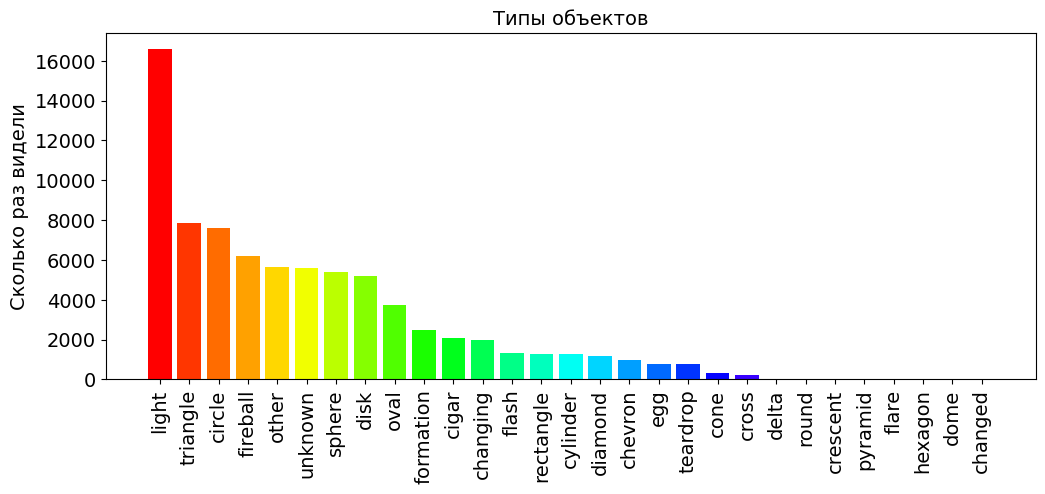

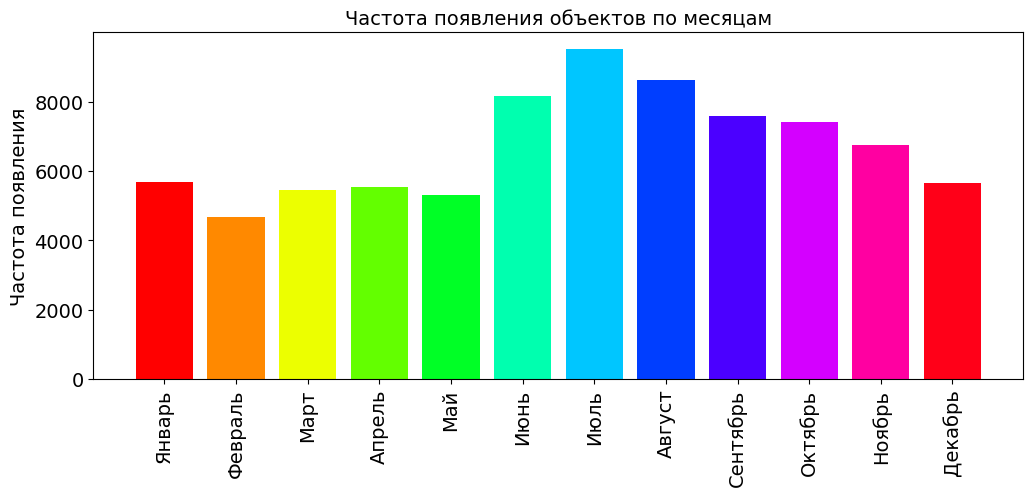

In [3]:
shapes_type_count = pd.value_counts(df['shape'].values, sort=True)
shapes_type_count_keys, shapes_type_count_values = dict_sort(dict(shapes_type_count))
OBJECT_COUNT = len(shapes_type_count_keys)
plt.title('Типы объектов', fontsize=PLOT_LABEL_FONT_SIZE)
bar = plt.bar(np.arange(OBJECT_COUNT), shapes_type_count_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_type_count_keys, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Сколько раз видели', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()
MONTH_COUNT = [0,0,0,0,0,0,0,0,0,0,0,0]
MONTH_LABEL = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь' ,'Октябрь' ,'Ноябрь' ,'Декабрь']

for i in df['datetime']:
    m,d,y_t =  i.split('/')
    MONTH_COUNT[int(m)-1] = MONTH_COUNT[int(m)-1] + 1

plt.bar(np.arange(12), MONTH_COUNT, color=getColors(12))
plt.xticks(np.arange(12), MONTH_LABEL, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Частота появления', fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.title('Частота появления объектов по месяцам', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

<ipython-input-2-4c15b7e75fe5>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


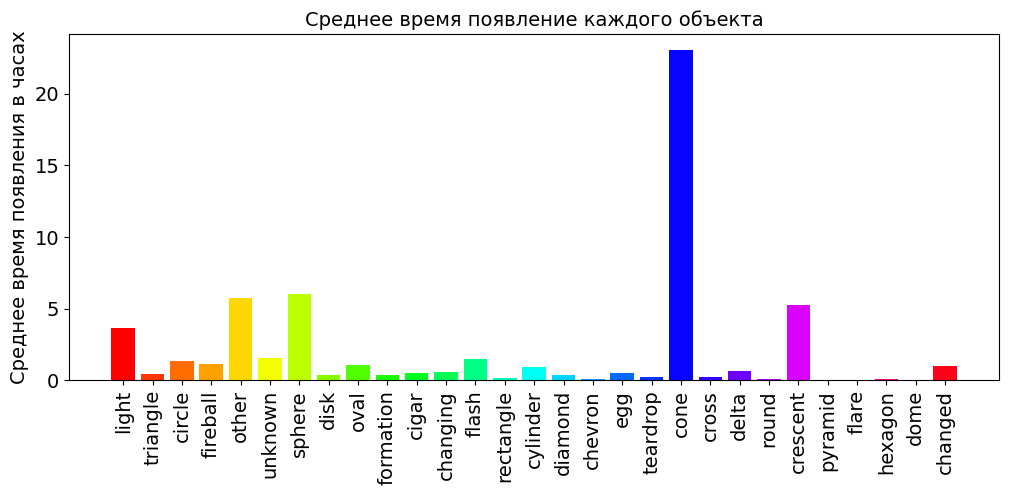

In [4]:
shapes_durations_dict = {}
for i in shapes_type_count_keys:
     dfs = df[['duration (seconds)', 'shape']].loc[df['shape'] == i]
     shapes_durations_dict[i] = dfs['duration (seconds)'].mean(axis=0)/60.0/60.0

#shapes_durations_dict_keys, shapes_durations_dict_values = dict_sort(shapes_durations_dict)
shapes_durations_dict_keys = []
shapes_durations_dict_values = []
for k in shapes_type_count_keys:
    shapes_durations_dict_keys.append(k)
    shapes_durations_dict_values.append(shapes_durations_dict[k])

plt.title('Среднее время появление каждого объекта', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(OBJECT_COUNT), shapes_durations_dict_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_durations_dict_keys, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Среднее время появления в часах', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

<ipython-input-2-4c15b7e75fe5>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


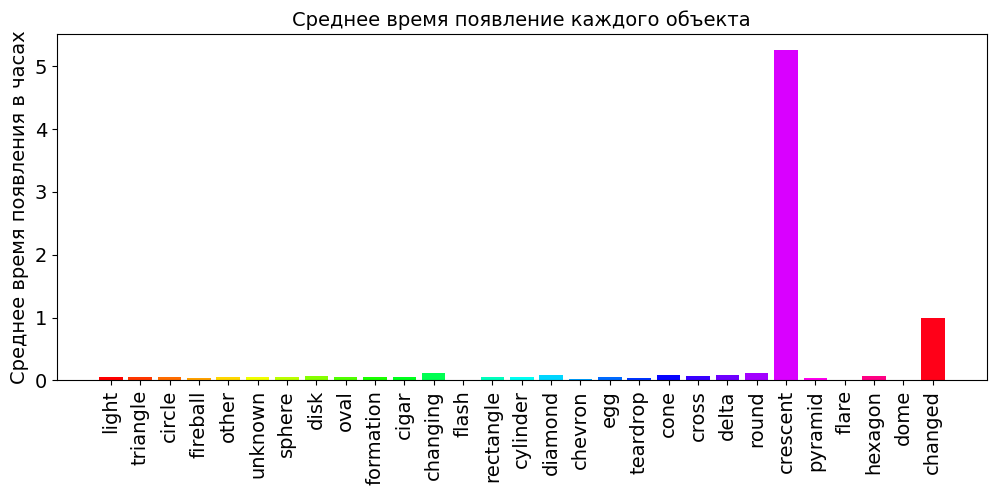

In [5]:
shapes_durations_dict = {}
for i in shapes_type_count_keys:
     dfs = df[['duration (seconds)', 'shape']].loc[df['shape'] == i]
     shapes_durations_dict[i] = dfs['duration (seconds)'].median(axis=0)/60.0/60.0

#shapes_durations_dict_keys, shapes_durations_dict_values = dict_sort(shapes_durations_dict)
shapes_durations_dict_keys = []
shapes_durations_dict_values = []
for k in shapes_type_count_keys:
    shapes_durations_dict_keys.append(k)
    shapes_durations_dict_values.append(shapes_durations_dict[k])

plt.title('Среднее время появление каждого объекта', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(OBJECT_COUNT), shapes_durations_dict_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_durations_dict_keys, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Среднее время появления в часах', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()